# **Assignment One**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi = 22/7

###Plot for Question 2

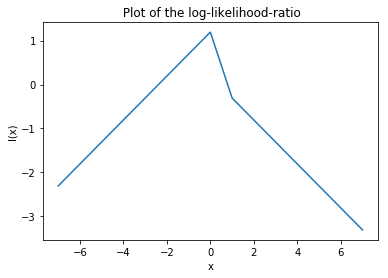

In [25]:
x3 = np.linspace(-7, 7, 1000)
Lx = np.abs(x3 - 1)/2 - np.abs(x3) + 0.693
plt.plot(x3,Lx)
plt.xlabel('x')
plt.ylabel('l(x)')
plt.title(' Plot of the log-likelihood-ratio')
plt.rcParams.update({'font.size': 10})

###Plot for Question 4

In [0]:
x = np.linspace(-5,7,1000)
mu = 1
sigma = np.sqrt(2)
pxl1 = (1/np.sqrt(2*pi))*np.exp(-(x**2)/2)
pxl2 = (1/((np.sqrt(2*pi)*sigma)))*np.exp(-(x - mu)**2/(2*sigma**2))

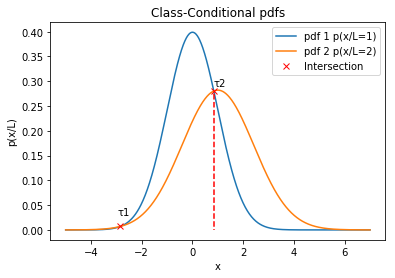

In [28]:
plt.plot(x, pxl1)
plt.plot(x, pxl2)
plt.plot(0.840, 0.280, 'rx')
plt.plot([0.840]*7, [0.275, 0.25, 0.20, 0.15, 0.10, 0.05, 0.00], 'r--')
plt.plot(-2.84, 7.071*10**(-3), 'rx')
plt.xlabel('x')
plt.ylabel('p(x/L)')
plt.title('Class-Conditional pdfs')
plt.legend(('pdf 1 p(x/L=1)', 'pdf 2 p(x/L=2)', 'Intersection'))
plt.text(0.840, 0.290, 'τ2')
plt.text(-2.96, 30.571*10**(-3), 'τ1')
plt.rcParams.update({'font.size': 10})

In [0]:
pl1 = 0.5
pl2 = 0.5

pl1x = pxl1*pl1/(pxl1*pl1 + pxl2*pl2)
pl2x = pxl2*pl2/(pxl1*pl1 + pxl2*pl2)


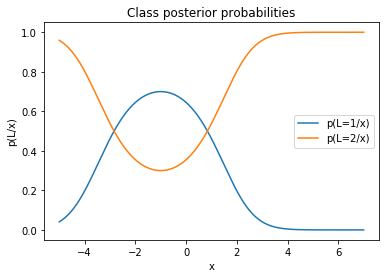

In [30]:
plt.plot(x, pl1x)
plt.plot(x, pl2x)
plt.xlabel('x')
plt.ylabel('p(L/x)')
plt.title('Class posterior probabilities')
plt.legend(('p(L=1/x)', 'p(L=2/x)'))
plt.rcParams.update({'font.size': 10})

###Code for Question 5

In [0]:
def multi_rand(N, n, mu, sig):
  # Draw random variables from z ~ (0, I)
  mean = np.zeros(n) 
  cov = np.identity(n)
  x = np.random.multivariate_normal(mean, cov, N).T # Generates N samples distributed according to 0 mean and Identity covariance matrix of z
  
  #Applying the linear transform to generate random samples distributed according to given mu and sigma
  b = mu.reshape(n,1)
  eigvals, eigvec = np.linalg.eig(sig) # Generating eigen vectos and eigen values from given sigma
  A = eigvec@np.sqrt(np.diag(eigvals)) # Putting the eigen values in a diagonal matrix and calculating A using A = UΛ^(0.5)
  y = A@x + b # Applying the linear transform
  
  return y

In [43]:
N = 5 # Number of samples
n = 4 # Number of dimensions
mu = np.array([1, 2, 6, 2]) # Mean vector
sig = np.array([[4, 1, 1, 1], [1, 4, 1, 1], [1, 1, 4, 1], [1, 1, 1, 4]]) #Covariance matrix

multi_rand(N, n, mu, sig) # Generates 5 samples of 4 dimentional random variables

array([[ 3.69991731, -1.74728677, -0.30496227,  4.8716003 ,  2.56422325],
       [ 4.65600604,  3.63408401,  3.20875915,  1.93705863,  3.74928052],
       [ 7.08460728,  6.26874409,  4.45388277,  5.99923366,  3.90864814],
       [ 5.60812582,  1.7920767 ,  3.3983353 ,  5.14214496,  3.1982065 ]])